<a href="https://colab.research.google.com/github/llucasmarques/Regression_Study_Coursera/blob/main/Regression_Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries used on this project

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Dataset and Project

Beer is one of the main alcoholic drinks that are consumed in Brazil.
The objective of this project, is to develop two models using Linear Regression that can predict the beer consumption in São Paulo - SP (2015).

These datas were colected in a university area in São Paulo, where exists too many bars and parties.



Data Description:

*   data - Data
*   temp_media - Medium Temperature (°C)
*   temp_min - Minimum Temperature (°C)
*   temp_max - Maximum Temperature (°C)
*   chuva - Preciptation (mm)
*   fds - Weekend (1 = Yes; 0 = No)
*   consumo - Beer consumption (liters)



In [ ]:
data = pd.read_csv('Consumo_cerveja.csv', sep=';')
data

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [ ]:
#This dataset was colected on 2015 (365 days)
data.shape

(365, 7)

# Preliminary Analyzes

In [ ]:
data.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [ ]:
#Correlation Matrix
data.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


The Beer Consumption have a high correlation between Weekend, Precipitation and Maximum Temperature variables

This correlation can be interpreted as:


*   Raining Days, people avoid to go out and drink beer
*   Hot days, people prefer to drink more beers (In Brazil the beer is drunk cold due to high temperatures)
*   Weekend, have a great correlation due to people prefer to drink and go out on weekends because in Brazil is not commom to work or go to university on weekends

In this case, we will use 'Temp_Max', 'Chuva' and 'FDS' as the best variables to our model



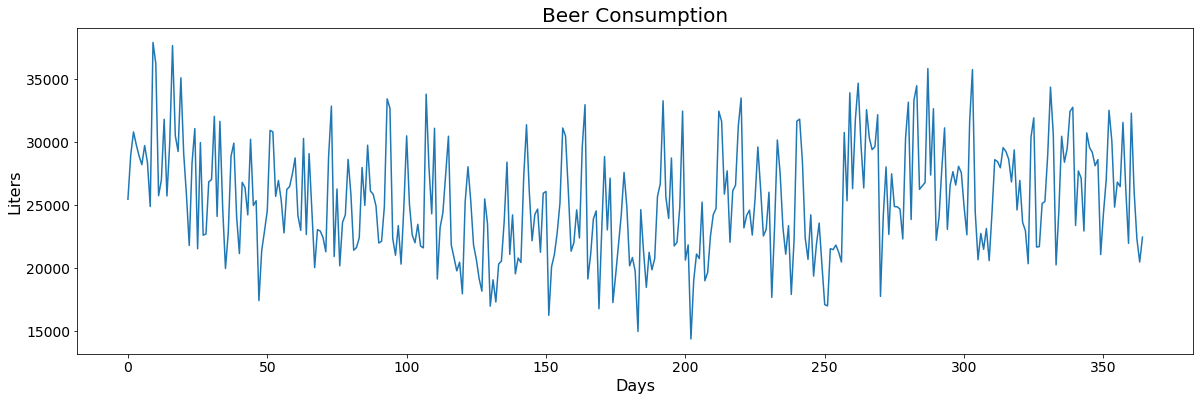

In [ ]:
#Check the Beer Consumption over the entire year
#We can check if hot days(Summer December-March) the brazilians drink more beer
#Check if colder days(Winter Jun-Sep) the brazilians drink less beer
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Beer Consumption', fontsize=20)
ax.set_ylabel('Liters', fontsize=16)
ax.set_xlabel('Days', fontsize=16)
ax = data['consumo'].plot(fontsize=14)

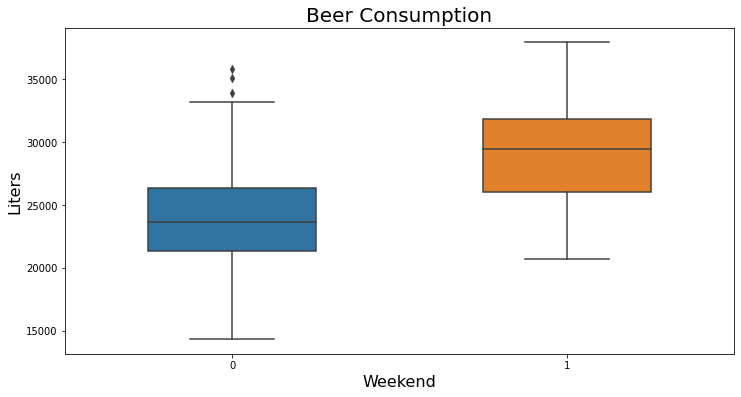

In [ ]:
ax = sns.boxplot(y='consumo', x='fds', data=data, width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Beer Consumption', fontsize = 20)
ax.set_ylabel('Liters', fontsize = 16)
ax.set_xlabel('Weekend', fontsize = 16)
sns.set_palette("Accent")
sns.set_style("darkgrid")
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


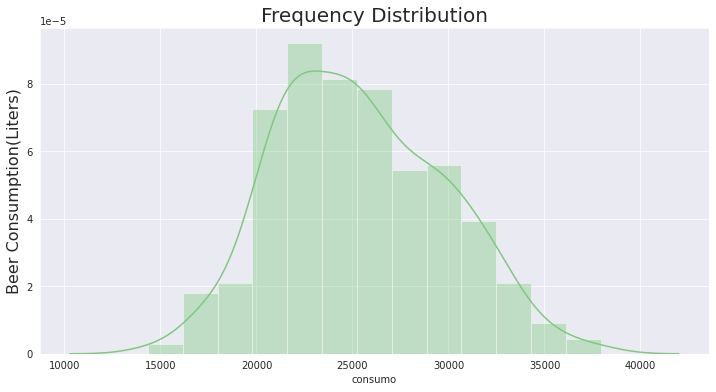

In [ ]:
#Frequency Distribution
ax = sns.distplot(data['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Frequency Distribution', fontsize = 20)
ax.set_ylabel('Beer Consumption(Liters)', fontsize = 16)
ax

Text(0.5, 1.1, 'Dispersion between variables')

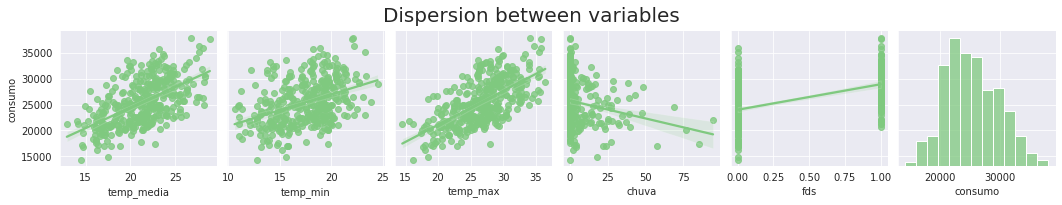

In [ ]:
#Dispersion Between variables
ax = sns.pairplot(data, y_vars='consumo', kind='reg')
ax.fig.suptitle('Dispersion between variables', fontsize = 20, y = 1.1)

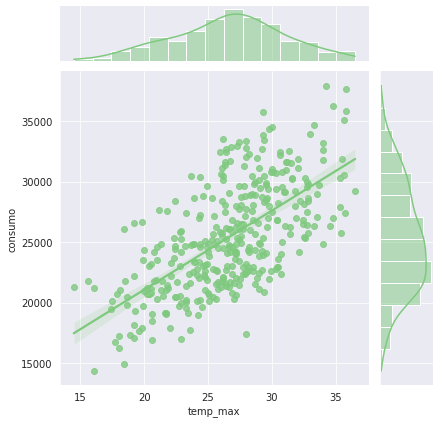

In [ ]:
#Plot checking the Maximum temperature and the comsuption
ax = sns.jointplot(x="temp_max", y="consumo", data=data, kind = "reg")

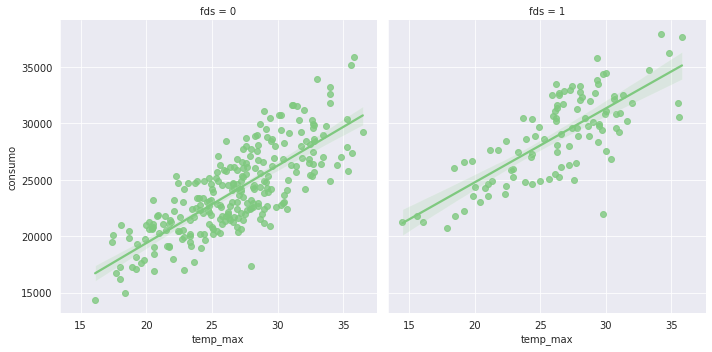

In [ ]:
#Using a third variable (Weekend)
ax = sns.lmplot(x="temp_max", y="consumo", data=data, col="fds")

# Linear Regression

In this project I will create two different models and compare between both LinearRegression Models

In [ ]:
y = data['consumo']
X = data[['chuva', 'fds', 'temp_max']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### R²

Check how the Regression line fits with our data (Value between 0 and 1)

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
print('R² = {}'.format(model.score(X_train, y_train).round(2)))

R² = 0.73


In [ ]:
y_predict = model.predict(X_test)

In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_predict).round(2))

R² = 0.69


# Checking our Model

Now we can test this model providing some values to check the predicted Consumption

In [ ]:
tested_value = X_test[0:1]
tested_value

,chuva,fds,temp_max
5,12.2,0,30.5


In [ ]:
#A day with 30.5 C and a preciptation 12.2mm (Not Weekend)
model.predict(tested_value)[0]
print('{0:.2f} liters' .format(model.predict(tested_value)[0]))

26094.90 liters


# Intercept and Regression Coeficients

In [ ]:
model.intercept_

5951.976339312467

In [ ]:
model.coef_

array([ -60.7824355 , 5401.08333866,  684.73675898])

In [ ]:
index=['Intercepto', 'Rain(mm)', 'Weekend', 'MAX Temperature']
pd.DataFrame(data=np.append(model.intercept_, model.coef_), index=index, columns=['Parameters'])

,Parameters
Intercepto,5951.976339
Rain(mm),-60.782435
Weekend,5401.083339
MAX Temperature,684.736759


Intercepto -> Medium Beer Consumption (desconsidering the variables effect) will be 5951.97

Max Temperature -> Keeping Rain and Weekend constant, the temperature can generate a medium variation on beer consumption of 684.73

Rain -> Keep Maximum Temperature and Weekend as constant, the rain can generate a -60,78liters of variation

Weekend -> The fact to be a Weekend, the beer consumption can variate 5401,08 liters

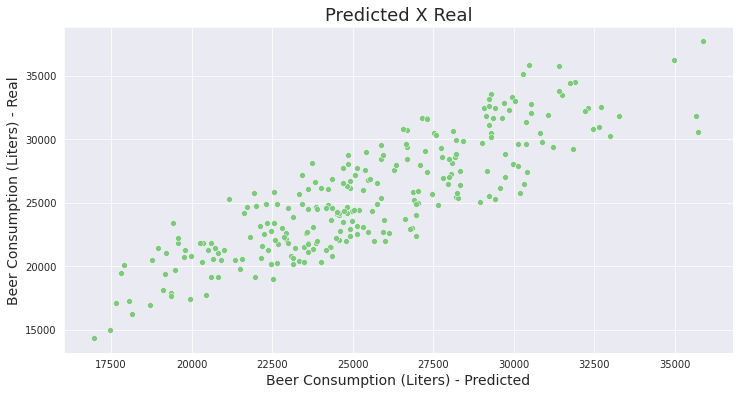

In [ ]:
y_predict_train = model.predict(X_train)

#Dispersion graph between the Predicted value and the Real value
ax = sns.scatterplot(x=y_predict_train, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Predicted X Real', fontsize=18)
ax.set_xlabel('Beer Consumption (Liters) - Predicted', fontsize=14)
ax.set_ylabel('Beer Consumption (Liters) - Real', fontsize=14)
ax

In [ ]:
residuals = y_train - y_predict_train
residuals

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


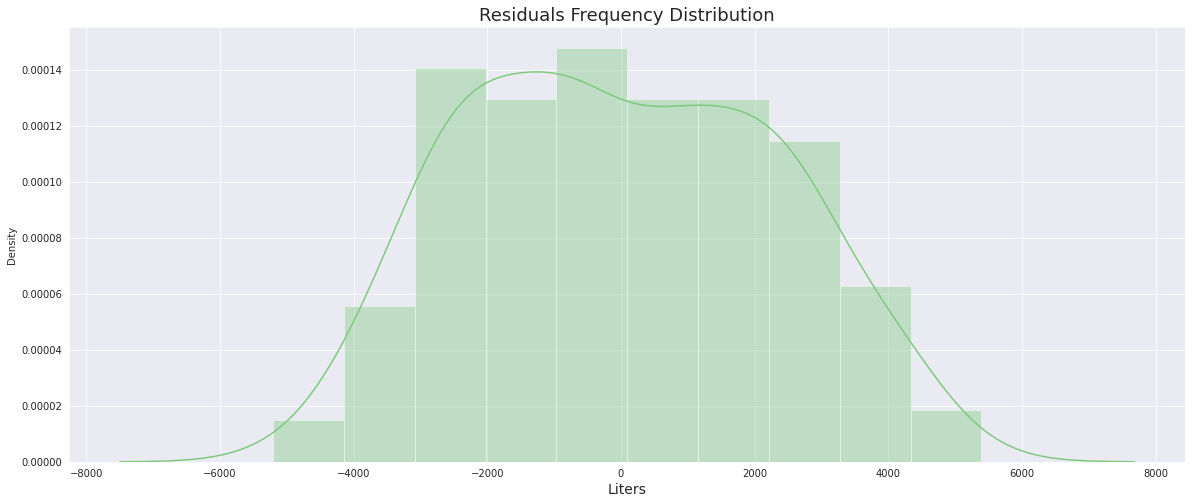

In [ ]:
ax = sns.distplot(residuals)
ax.figure.set_size_inches(20,8)
ax.set_title('Residuals Frequency Distribution', fontsize=18)
ax.set_xlabel('Liters', fontsize=14)
ax

# Creating a new model using a different approach

I will change the Temperature variable (Max -> Medium)

In [ ]:
X2 = data[['temp_media', 'chuva', 'fds']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)
model_2 = LinearRegression()
model_2.fit(X2_train, y2_train)

LinearRegression()

# Comparing both models

In [ ]:
print('Model MEDIUM Temp')
print('R² = {}'.format(model_2.score(X2_train, y2_train).round(2)))

Model MEDIUM Temp
R² = 0.66


In [ ]:
print('Model MAX Temp')
print('R² = {}'.format(model.score(X_train, y_train).round(2)))

Model MAX Temp
R² = 0.73


In [ ]:
y_predict = model.predict(X_test)
y_predict_2 = model_2.predict(X2_test)

In [ ]:
print('Model MEDIUM Temp')
print('R² = {}'.format(metrics.r2_score(y2_test, y_predict_2).round(2)))

Model MEDIUM Temp
R² = 0.66


In [ ]:
print('Model MAX Temp')
print('R² = {}'.format(metrics.r2_score(y_test, y_predict).round(2)))

Model MAX Temp
R² = 0.69


# Adding other Regression Metric


EQM

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

REQM

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

In [ ]:
#Medium
EQM_2 = metrics.mean_squared_error(y2_test, y_predict_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_predict_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_predict_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Metrics'])

,Metrics
EQM,6060775.46
REQM,2461.86
R²,0.66


In [ ]:
#Maximum Temperature
EQM = metrics.mean_squared_error(y_test, y_predict).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_predict)).round(2)
R2 = metrics.r2_score(y_test, y_predict).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Metrics'])

,Metrics
EQM,5471976.38
REQM,2339.23
R²,0.69


# Results

In this project we can see that the first Model is better than the second. This show the importance to use a variable that fits better (more correlative percentage).

For further improvements: 


*   We can use other algorithm to compare the results and check how good other algorithm can be with this dataset.
*   Search for other dataset that have more data (Not just 365 days), with more data we can have a better model and predict with more precision.


